<a href="https://colab.research.google.com/github/avanegasp/Entrega_Modulo_5/blob/main/Modulo5_PRAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
viviendas = pd.read_csv('https://raw.githubusercontent.com/avanegasp/Alura/main/inmuebles_bogota.csv')

In [48]:
#Creo una copia independiente de viviendas
copia_ind_viviendas = viviendas.copy()

In [49]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Baños         9520 non-null   int64 
 4   Área          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [50]:
viviendas.describe()

,Habitaciones,Baños,Área
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


In [51]:
viviendas.describe(include='object')

,Tipo,Descripcion,Barrio,UPZ,Valor
count,9520,9520,9520,9478,9520
unique,8,316,149,63,1039
top,Apartamento,Apartamento en venta en Usaquén,Usaquén,Usaquén,$ 450.000.000
freq,7327,916,1105,1681,128


In [52]:
#Cambio el nombre de las columnas Baños y Área

columnas = {'Baños' : 'Banos', 'Área': 'Area'}
viviendas = viviendas.rename(columns = columnas)

In [53]:
#Verificar que queden bien los nombres con los cambios
viviendas.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Banos', 'Area', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [54]:
viviendas.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
887,Apartamento,Apartamento en venta en El Batán,3,5,163,El Batán,La Alhambra,$ 1.350.000.000
5165,Apartamento,Apartamento en venta en Chapinero Alto,1,2,60,Chapinero Alto,CHAPINERO: Pardo Rubio + Chapinero,$ 399.000.000
5842,Apartamento,Apartamento en venta en Chapinero,1,1,31,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 241.200.000
9057,Apartamento,Apartamento en venta en Chico Reservado,3,3,110,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 985.000.000
2281,Apartamento,Apartamento en venta en Barrios Unidos,3,2,48,Barrios Unidos,Los Andes,$ 135.000.000


In [55]:
round(viviendas.Area.mean(),2)

146.66

In [56]:
# Cúantos barrios tengo con sus viviendas hay a la venta

viviendas[['Barrio', 'Tipo']].value_counts()

Barrio              Tipo       
Usaquén             Apartamento    921
Zona Noroccidental  Apartamento    635
Cedritos            Apartamento    502
Bosa                Apartamento    499
Santa Barbara       Apartamento    393
                                  ... 
Prado Veraniego     Apartamento      1
El Refugio          Casa             1
                    Local            1
Pinar De Suba       Casa             1
Alameda             Apartamento      1
Length: 303, dtype: int64

In [57]:
# UPZ hay 119 en Bogotá, acá hay en más del 50% venta de viviendas
unique_upz_count = len(viviendas.UPZ.unique())

print("Número de UPZ únicas:", unique_upz_count)

Número de UPZ únicas: 64


## Imputaciones de la UPZ

## Cantidad de viviendas a la venta en Bogotá

<Axes: >

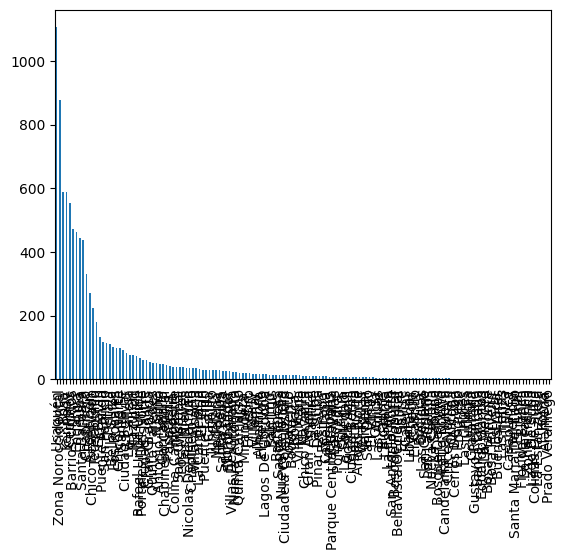

In [58]:
viviendas.Barrio.value_counts().plot(kind='bar')

### Top 10 barrios con más vivienda para ventas en Bogotá

<Axes: >

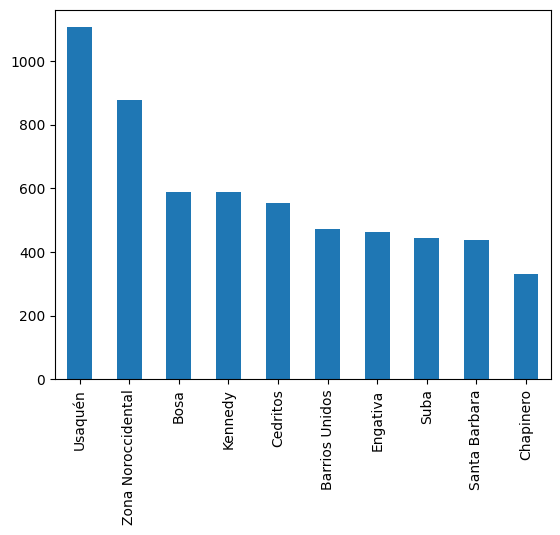

In [100]:
viviendas_barrio = viviendas.Barrio.value_counts()
viviendas_barrio.head(10).plot.bar()

### Top 10 de los Barrios por Área en Bogotá

<Axes: xlabel='Barrio'>

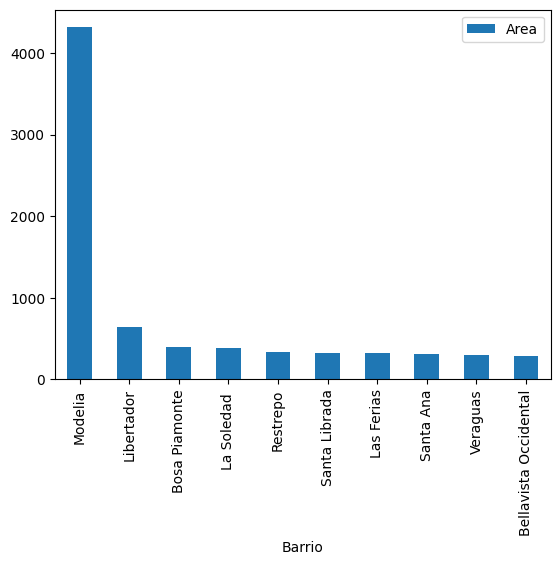

In [60]:
# Promedio de área de todos las viviendas en los barrios en el dataset. El top 10.
viviendas[['Barrio','Area']].groupby(['Barrio']).mean().sort_values(by=['Area'],
        ascending=False).head(10).plot(kind='bar')

### Metro Cuadrado por Barrio

Valor de la vivienda / Área

In [67]:
#La columna valor está en string
type(viviendas.Valor[0])

str

In [73]:
#Dividimos la columna valor en 2 columnas
valor = viviendas.Valor.str.split(expand=True)
valor

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [75]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Pesos         9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [77]:
viviendas.Valor[1]+viviendas.Valor[2]

'$ 670.000.000$ 1.120.000.000'

In [88]:
viviendas['Pesos'] = valor[0]
viviendas['Precio'] = valor[1]

viviendas.sample(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio
8978,Apartamento,Apartamento en venta en Usaquén,3,2,91,Usaquén,Usaquén,$ 520.000.000,$,520.000.000
1992,Apartamento,Apartamento en venta en Barrios Unidos,3,2,71,Barrios Unidos,Los Andes,$ 520.000.000,$,520.000.000


In [89]:
viviendas.Precio[1]+viviendas.Precio[2]

'670.000.0001.120.000.000'

In [90]:
#Se elimina el punto de millar en el valor
viviendas['Precio'] = viviendas['Precio'].str.replace('.','',regex=True)

In [93]:
type(viviendas.Precio[1])

str

In [94]:
#Se crea una nueva columna y se eliminan 6 ceros
viviendas['Precio_Final'] = viviendas['Precio'].astype('float')/1000000

In [95]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Valor         9520 non-null   object 
 8   Pesos         9520 non-null   object 
 9   Precio        9520 non-null   object 
 10  Precio_Final  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [96]:
viviendas.Precio_Final

0        360.00
1        670.00
2       1120.00
3        890.00
4        970.00
         ...   
9515     290.00
9516     670.00
9517     900.00
9518     335.00
9519     144.99
Name: Precio_Final, Length: 9520, dtype: float64

### Detección de outliers

In [97]:
viviendas.describe()

,Habitaciones,Banos,Area,Precio_Final
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


En este describe se puede notar que hay una dato con 110 habitaciones y otro con Precio_Final de 16000 millones de pesos.

In [99]:
viviendas.loc[viviendas.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.0


<Axes: xlabel='Habitaciones'>

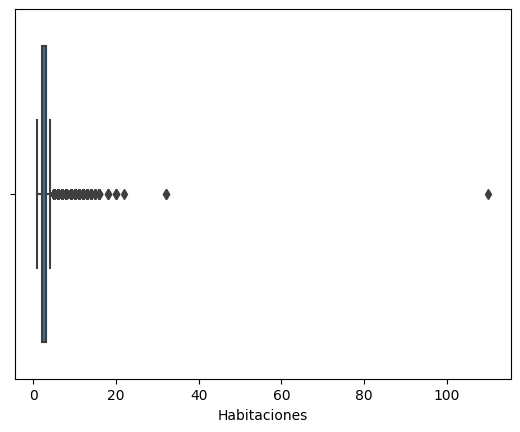

In [106]:
sns.boxplot(data=viviendas, x='Habitaciones')

In [101]:
viviendas.loc[viviendas.Precio_Final == 16000]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
5234,Edificio,Edificio en venta en Usaquén,12,7,1664,Usaquén,Usaquén,$ 16.000.000.000,$,16000000000,16000.0


<Axes: xlabel='Precio_Final'>

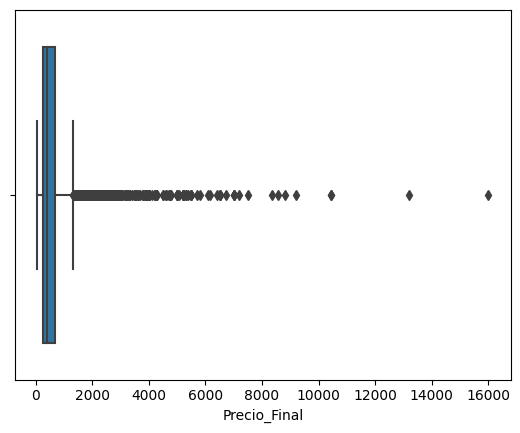

In [105]:
sns.boxplot(data=viviendas, x='Precio_Final')

In [107]:
viviendas.loc[viviendas['Banos'] == 0]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
2910,Edificio,Edificio en venta en Santa Barbara,22,0,1080,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 9.200.000.000,$,9200000000,9200.0
8193,Casa,Casa en venta en Puente Aranda,15,0,450,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 1.000.000.000,$,1000000000,1000.0
9451,Casa,Casa en venta en Bosa,10,0,540,Bosa,Bosa Central,$ 800.000.000,$,800000000,800.0


<Axes: xlabel='Banos'>

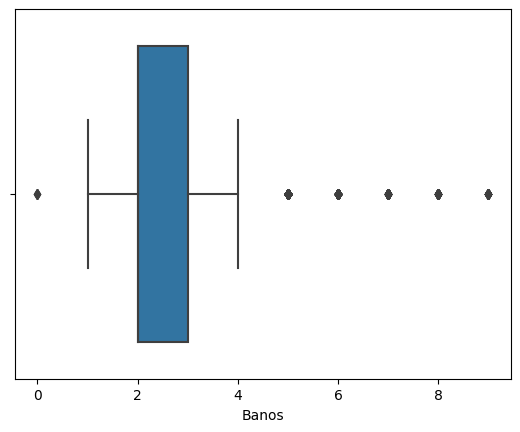

In [108]:
sns.boxplot(data=viviendas, x='Banos')

In [109]:
viviendas.loc[viviendas.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.0


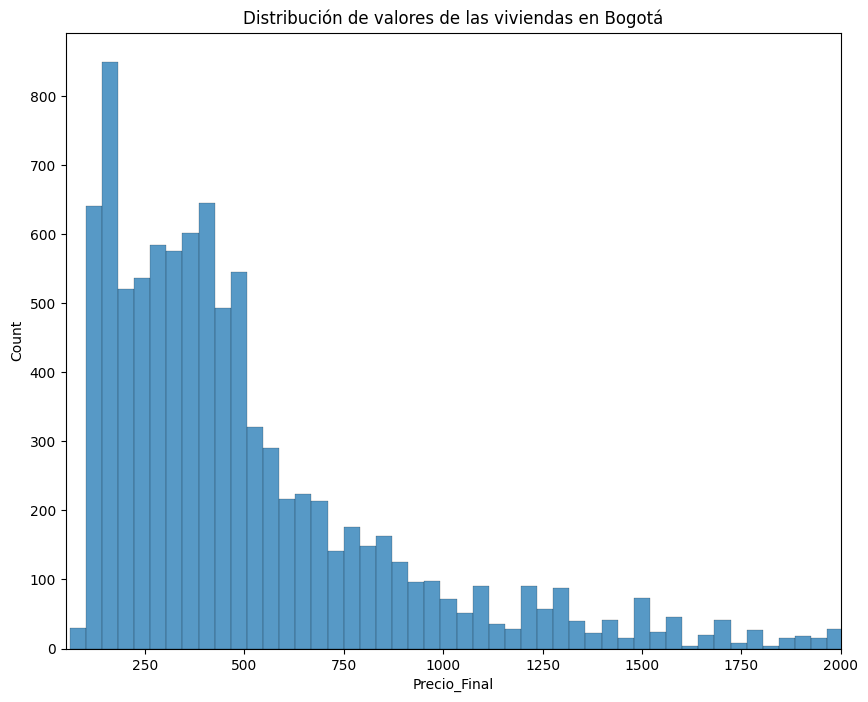

In [115]:
plt.figure(figsize=(10,8))
graphic = sns.histplot(data=viviendas, x='Precio_Final')
graphic.set_title('Distribución de valores de las viviendas en Bogotá')
#Se establece los valores min y max que se vió en el describe
plt.xlim(50,2000)
plt.show()

En el describe se puede notar que el 75% de los datos tienen un valor máximo de precio final de 680 millones de pesos por este motivo se ajusta la gráfica a 1000 millones

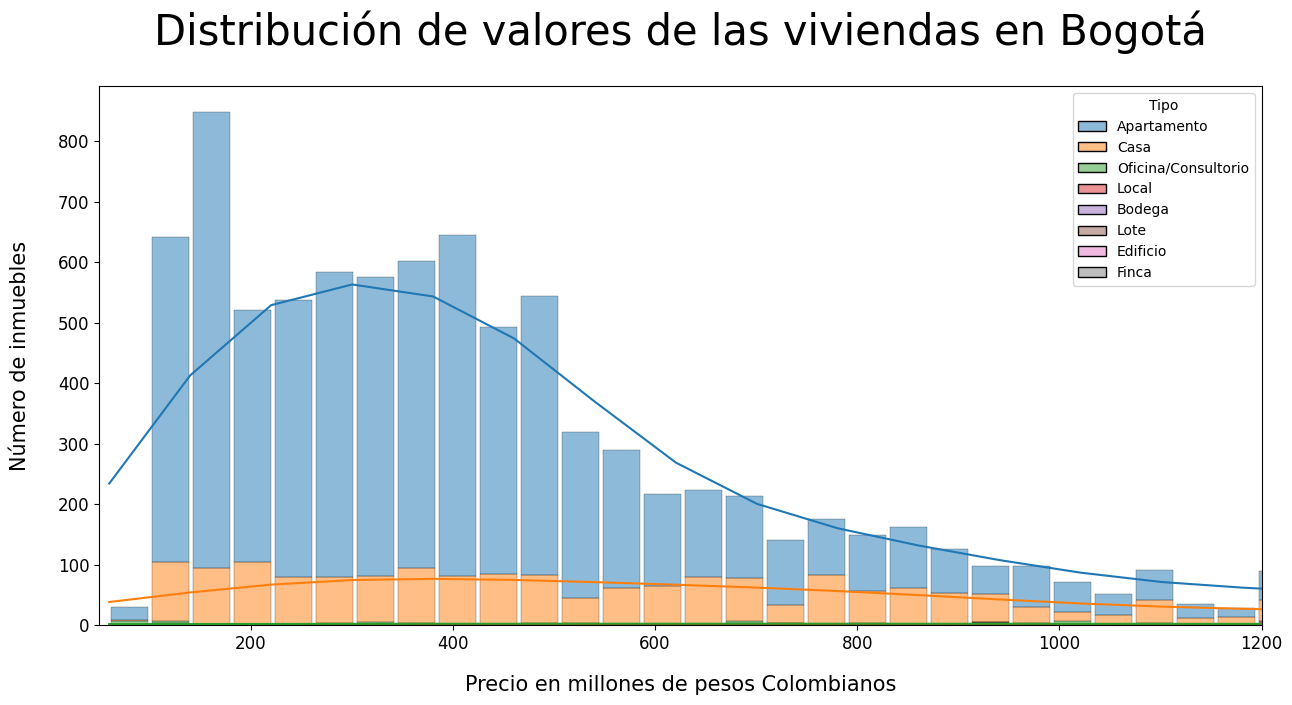

In [167]:
#viviendas_principal = ['Apartamento','Finca', 'Oficina/Consultorio']
#viviendas_filtradas = viviendas[viviendas['Tipo'].isin(viviendas_principal)]

# Se crea el gráfico con los datos filtrados
plt.figure(figsize=(15, 7))
graphic = sns.histplot(data=viviendas, x='Precio_Final', kde=True, hue='Tipo', shrink=0.9, multiple='stack')
plt.title('Distribución de valores de las viviendas en Bogotá',pad=30, fontsize=30)
plt.ylabel('Número de inmuebles', labelpad=20, fontsize = 15)
plt.xlabel('Precio en millones de pesos Colombianos', labelpad=16, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(50, 1200)

plt.show()

### Viviendas Filtradas

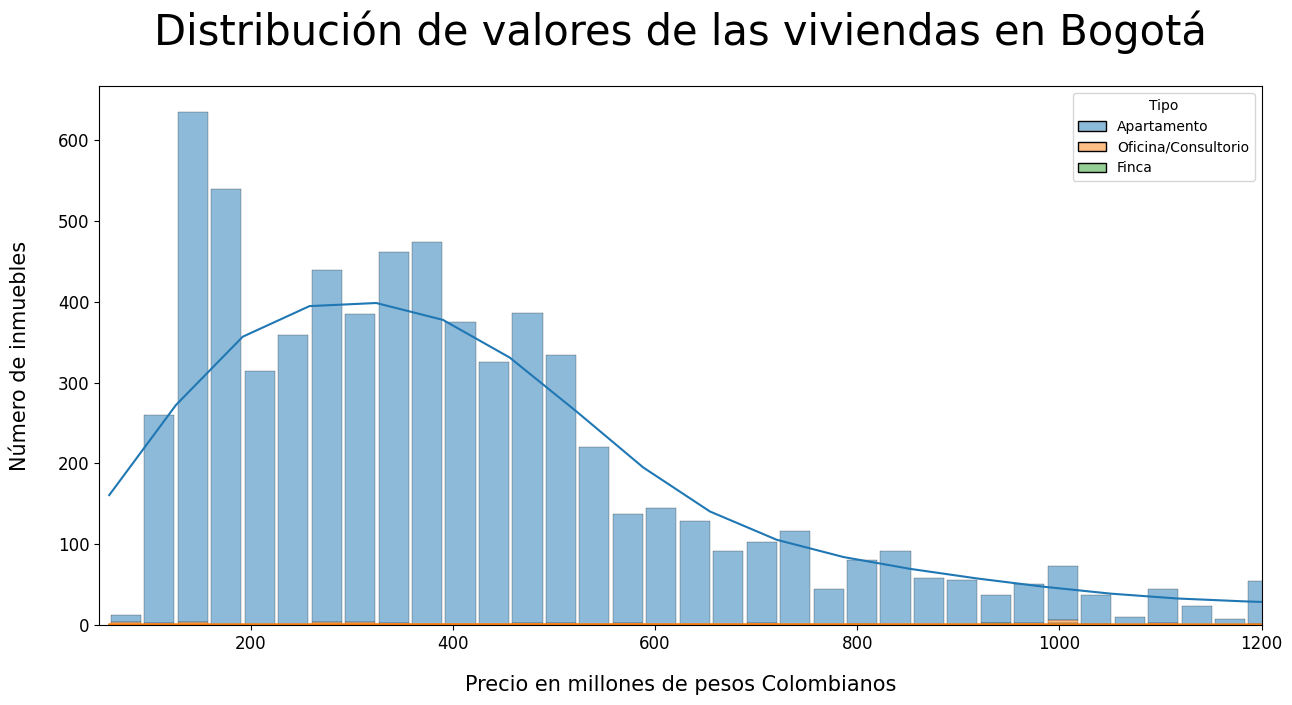

In [168]:
viviendas_principal = ['Apartamento','Finca', 'Oficina/Consultorio']
viviendas_filtradas = viviendas[viviendas['Tipo'].isin(viviendas_principal)]

# Se crea el gráfico con los datos filtrados
plt.figure(figsize=(15, 7))
graphic = sns.histplot(data=viviendas_filtradas, x='Precio_Final', kde=True, hue='Tipo', shrink=0.9, multiple='stack')
plt.title('Distribución de valores de las viviendas en Bogotá',pad=30, fontsize=30)
plt.ylabel('Número de inmuebles', labelpad=20, fontsize = 15)
plt.xlabel('Precio en millones de pesos Colombianos', labelpad=16, fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(50, 1200)

plt.show()

In [138]:
viviendas.Tipo.value_counts()

Apartamento            7327
Casa                   2043
Oficina/Consultorio      60
Local                    38
Edificio                 22
Bodega                   13
Finca                    11
Lote                      6
Name: Tipo, dtype: int64

In [145]:
viviendas.loc[viviendas['Tipo']=='Apartamento'].head(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000,$,360000000,360.0
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000,$,1120000000,1120.0


### Precio del metro cuadrado por Barrio

In [175]:
#Se agrega la columna M2
viviendas['Precio_Cuadrado'] = viviendas['Precio_Final']/viviendas['Area']

In [177]:
viviendas.sample(2)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Pesos,Precio,Precio_Final,Precio_Cuadrado
1050,Apartamento,Apartamento en venta en Kennedy,3,2,67,Kennedy,Kennedy Central,$ 290.000.000,$,290000000,290.0,4.328358
1314,Apartamento,Apartamento en venta en Engativa,3,2,64,Engativa,Engativá,$ 240.000.000,$,240000000,240.0,3.750000


In [190]:
# Filtrar los 10 primeros barrios
M2_barrio = viviendas['Barrio'].value_counts().head(10).index.tolist()

# Crear un nuevo DataFrame solo con los 10 primeros barrios
viviendas_top_10 = viviendas[viviendas['Barrio'].isin(M2_barrio)]

# Calcular el área cuadrada de esos barrios
area_cuadrada_total = viviendas_top_10.groupby('Barrio')['Precio_Cuadrado'].mean().reset_index()

# Ordenar el DataFrame area_cuadrada_total de mayor a menor por el área cuadrada total
area_cuadrada_total = area_cuadrada_total.sort_values(by='Precio_Cuadrado', ascending=False)

# Mostrar el área cuadrada total de los 10 primeros barrios
print(area_cuadrada_total)

               Barrio  Precio_Cuadrado
3           Chapinero         7.427815
6       Santa Barbara         6.168665
8             Usaquén         5.732163
2            Cedritos         5.150231
9  Zona Noroccidental         4.617059
7                Suba         4.516300
0      Barrios Unidos         4.377606
4            Engativa         3.886813
5             Kennedy         3.612320
1                Bosa         2.808765


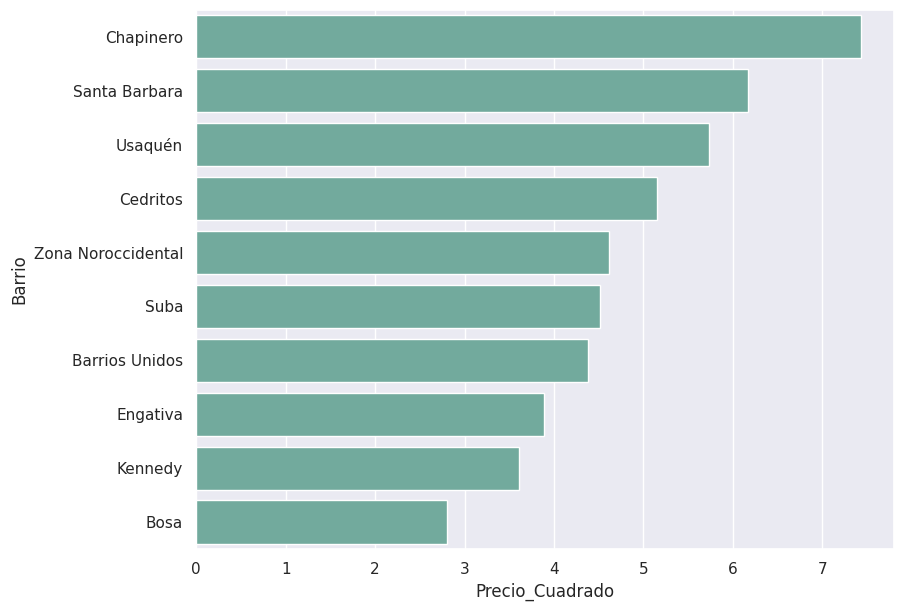

In [204]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(9, 7))

# plot a bar chart
sns.barplot(
    x="Precio_Cuadrado",
    y="Barrio",
    data=area_cuadrada_total,
    estimator=sum,
    errorbar=None,
    color='#69b3a2');

plt.show()